The code you provided includes several Python libraries being imported into the current script using the import statement. Here is a brief explanation of each import statement:

requests library allows you to send HTTP/1.1 requests using Python, which means you can access webpages and retrieve data from them.

BeautifulSoup is a library for parsing HTML and XML documents, and is used here to extract data from HTML web pages.

time library is used here to call the sleep function, which pauses the script execution for a specified number of seconds, and helps prevent overwhelming the server between connections.

tqdm is a progress bar library used here to display a progress bar to show the status of a long-running process.

numpy is a numerical computing library that provides support for multi-dimensional arrays, matrices, and mathematical functions to manipulate them.

pandas is a library that provides data manipulation and analysis tools. In this code, it is used to wrangle data.

matplotlib is a plotting library used for creating static, interactive, and animated visualizations in Python.

plotly is an interactive visualization library that allows you to create and share interactive, web-based visualizations in Python.

The last two lines of the code set some options for Pandas to display data nicely when printing data frames.

In [1]:
import requests
from bs4 import BeautifulSoup

# To prevent overwhelming the server between connections
from time import sleep 

# Display the progress bar
from tqdm import tqdm

# For data wrangling
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# For creating plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go

This code defines a function named get_page that takes three arguments: city, type, and page.

The purpose of the function is to retrieve and parse a web page from the Kijiji website based on the specified arguments. The function creates a URL using the arguments and sends an HTTP GET request to the URL using the requests.get() function. The response is then parsed using BeautifulSoup and the parsed content is returned.

The function also checks the HTTP status code of the response and prints a message based on the code. If the status code is in the range of 200 to 299, the function considers the response successful and proceeds to parse the HTML content of the page. Otherwise, it prints an appropriate error message.

The function returns the parsed content of the webpage as a BeautifulSoup object.

In [2]:
def get_page(city, type,page):
  
  #  url = f'https://www.torontorentals.com/{city}/{type}?beds={beds}%20&p={page}'
    url = f"https://www.kijiji.ca/b-for-rent/{city}/{type}/page-{page}/k0c30349001l1700272?ad=offering&rb=true"
    # https://www.torontorentals.com/toronto/condos?beds=1%20&p=2
    
    result = requests.get(url)
    
    # check HTTP response status codes to find if HTTP request has been successfully completed
    if result.status_code >= 100  and result.status_code <= 199:
        print('Informational response')
    if result.status_code >= 200  and result.status_code <= 299:
        print('Successful response')
        soup = BeautifulSoup(result.content, "lxml")
    if result.status_code >= 300  and result.status_code <= 399:
        print('Redirect')
    if result.status_code >= 400  and result.status_code <= 499:
        print('Client error')
    if result.status_code >= 500  and result.status_code <= 599:
        print('Server error')
        
    return soup


This code creates an empty list named data and then runs a for loop that iterates over the range of numbers from 1 to 19 (inclusive).

For each iteration of the loop, the code first calls the sleep() function to pause the execution of the script for 2 seconds. This is to prevent overwhelming the server between connections.

The get_page() function is then called with the arguments 'toronto', 'rent', and 20, which returns a BeautifulSoup object containing the parsed content of a web page from the Kijiji website.

The code then uses soup_page.find_all() to find all the HTML elements on the page with the tag div and class attribute set to "info-container". These elements represent the rental listings on the page.

For each listing, the code uses list.find() to find specific HTML elements that contain information about the rental, such as the price, title, location, date posted, and description. The information is then stored in a list named info.

Finally, the info list is appended to the data list.

By the end of the loop, the data list contains a list of lists, where each inner list represents a rental listing and contains the rental's price, title, location, date posted, and description.

In [3]:
data = []
for page_num in tqdm(range(1, 20)):
    sleep(2)
    
    # get soup object of the page
    # Find all the listings on the page

    soup_page = get_page('toronto', 'rent',20)
    # Find all the listings on the page
    lists = soup_page.find_all("div", {"class": "info-container"})

    for list in lists:
        # Get the price of the listing
        price = list.find('div', class_="price").text.strip()

        # Get the address of the listing
        title = list.find('div', class_='title').text.strip()

        # Get the number of bedrooms and bathrooms
        location = list.find('span', class_="").text.strip()
        date_posted = list.find('span', class_="date-posted").text.strip()
        description = list.find('div', class_="description").text.strip()

        info = [price, title, location, date_posted, description]
        data.append(info)




  0%|          | 0/19 [00:00<?, ?it/s]

Successful response


  5%|▌         | 1/19 [00:06<01:48,  6.02s/it]

Successful response


 11%|█         | 2/19 [00:13<02:01,  7.14s/it]

Successful response


 16%|█▌        | 3/19 [00:23<02:10,  8.18s/it]

Successful response


 26%|██▋       | 5/19 [00:34<01:30,  6.44s/it]

Successful response


 32%|███▏      | 6/19 [00:39<01:18,  6.01s/it]

Successful response


 37%|███▋      | 7/19 [00:43<01:05,  5.43s/it]

Successful response
Successful response


 42%|████▏     | 8/19 [00:48<00:58,  5.35s/it]

Successful response


 53%|█████▎    | 10/19 [00:58<00:45,  5.04s/it]

Successful response
Successful response


 63%|██████▎   | 12/19 [01:13<00:44,  6.42s/it]

Successful response


 68%|██████▊   | 13/19 [01:21<00:40,  6.82s/it]

Successful response


 74%|███████▎  | 14/19 [01:29<00:36,  7.22s/it]

Successful response
Successful response


 84%|████████▍ | 16/19 [01:43<00:21,  7.18s/it]

Successful response


 89%|████████▉ | 17/19 [01:48<00:12,  6.49s/it]

Successful response


 95%|█████████▍| 18/19 [01:53<00:06,  6.04s/it]

Successful response
Successful response


100%|██████████| 19/19 [01:58<00:00,  6.22s/it]


In [4]:
print(data)

[['$625.00', 'Furnished Private Offices - Monthly Membership - Starting $625', 'Oakville / Halton Region', 'Yesterday', 'Get upto 2 months of free fully furnished office spaces when you sign up with ZEMLAR Offices. Contact us to claim now. *Limited availability Looking for the perfect place to grow your business? Tired ...\n                        \n                            \n                            \n                                \n                            \n                            \n                        \n\n                        \n                            \n                                Virtual Offices | Meeting Rooms | Furnished Offices | Private | office | coworking | workspcae | office space | Mississauga | GTA | Meeting room | month to month | Board Room for rent | Business Address | Phone Answering | Office Lease |'], ['$2,239.00', '1 Bedroom For Rent - Oakville - Convenience - Close to the Lake!', 'Oakville', '22/02/2023', "Situated in a peaceful, rela

This code uses the pandas library to create a DataFrame from the data list of lists. The pd.DataFrame() function is used to create the DataFrame, and the columns parameter is set to a list of column names: 'Price', 'Title', 'Location', 'Date Posted', and 'Description'.

The DataFrame is then saved to a CSV file named 'KijijiRentals.csv' using the df.to_csv() function. The index parameter is set to False to prevent the index column from being saved to the CSV file.

The resulting CSV file contains the data in tabular form, where each row represents a rental listing and contains the rental's price, title, location, date posted, and description.

In [5]:
import pandas as pd

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Price', 'Title', 'Location', 'Date Posted', 'Description'])

# Save the DataFrame to a CSV file
df.to_csv('KijijiRentals.csv', index=False)

In [7]:
import pandas as pd
df = pd.read_csv('/content/KijijiRentals.csv')

In [8]:
df.head()

,Price,Title,Location,Date Posted,Description
0,$625.00,Furnished Private Offices - Monthly Membership...,Oakville / Halton Region,Yesterday,Get upto 2 months of free fully furnished offi...
1,"$2,239.00",1 Bedroom For Rent - Oakville - Convenience - ...,Oakville,22/02/2023,"Situated in a peaceful, relaxing community, 75..."
2,"$1,650.00","Bachelor, Niagara and Queen - ID 2613",Toronto,01/03/2023,Semi-renovated Akelius studio apartment for re...
3,$900.00,Furnished Room For Rent All Inclusive Downtown...,Cobourg,05/02/2023,Furnished room for rent downtown Cobourg. Step...
4,"$9,000.00",Industrial Space For Rent,Toronto,< 23 hours ago,Approx 4000 sq ft of warehouse 1 drive in door...


In [9]:
df.shape

(855, 5)

In [10]:
df['Location'].nunique()

23

In [11]:
df.isnull().sum()

Price          0
Title          0
Location       0
Date Posted    0
Description    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        855 non-null    object
 1   Title        855 non-null    object
 2   Location     855 non-null    object
 3   Date Posted  855 non-null    object
 4   Description  855 non-null    object
dtypes: object(5)
memory usage: 33.5+ KB


In [13]:
df.head()

,Price,Title,Location,Date Posted,Description
0,$625.00,Furnished Private Offices - Monthly Membership...,Oakville / Halton Region,Yesterday,Get upto 2 months of free fully furnished offi...
1,"$2,239.00",1 Bedroom For Rent - Oakville - Convenience - ...,Oakville,22/02/2023,"Situated in a peaceful, relaxing community, 75..."
2,"$1,650.00","Bachelor, Niagara and Queen - ID 2613",Toronto,01/03/2023,Semi-renovated Akelius studio apartment for re...
3,$900.00,Furnished Room For Rent All Inclusive Downtown...,Cobourg,05/02/2023,Furnished room for rent downtown Cobourg. Step...
4,"$9,000.00",Industrial Space For Rent,Toronto,< 23 hours ago,Approx 4000 sq ft of warehouse 1 drive in door...


In [14]:
df.head(20)

,Price,Title,Location,Date Posted,Description
0,$625.00,Furnished Private Offices - Monthly Membership...,Oakville / Halton Region,Yesterday,Get upto 2 months of free fully furnished offi...
1,"$2,239.00",1 Bedroom For Rent - Oakville - Convenience - ...,Oakville,22/02/2023,"Situated in a peaceful, relaxing community, 75..."
2,"$1,650.00","Bachelor, Niagara and Queen - ID 2613",Toronto,01/03/2023,Semi-renovated Akelius studio apartment for re...
3,$900.00,Furnished Room For Rent All Inclusive Downtown...,Cobourg,05/02/2023,Furnished room for rent downtown Cobourg. Step...
4,"$9,000.00",Industrial Space For Rent,Toronto,< 23 hours ago,Approx 4000 sq ft of warehouse 1 drive in door...
5,Please Contact,4 Bedroom house in Brampton for rent,Brampton,< 17 hours ago,LOCATION NEAR FERNFOREST DR & SANDALWOOD PARKW...
6,"$3,500.00",4 Bedroom House for rent,Brampton,< 17 hours ago,4 Bedroom Detached with 2 car garage Upto 4 pa...
7,"$1,200.00","Room for rent, female only",Toronto,< 17 hours ago,"1 room in a 2 bedroom basement apartment, shar..."
8,"$1,000.00",One bedroom basement for rent,Brampton,< 17 hours ago,Only female No parking Separate kitchen Separa...
9,Please Contact,1 bedroom for rent,Mississauga,< 17 hours ago,One fully furnished bedroom available on upper...


In [15]:
# remove the dollar sign and comma from the "Price" column
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

# replace "Please Contact" values with NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


<ipython-input-15-db8572c768a2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


In [16]:
df.head(20)

,Price,Title,Location,Date Posted,Description
0,625.0,Furnished Private Offices - Monthly Membership...,Oakville / Halton Region,Yesterday,Get upto 2 months of free fully furnished offi...
1,2239.0,1 Bedroom For Rent - Oakville - Convenience - ...,Oakville,22/02/2023,"Situated in a peaceful, relaxing community, 75..."
2,1650.0,"Bachelor, Niagara and Queen - ID 2613",Toronto,01/03/2023,Semi-renovated Akelius studio apartment for re...
3,900.0,Furnished Room For Rent All Inclusive Downtown...,Cobourg,05/02/2023,Furnished room for rent downtown Cobourg. Step...
4,9000.0,Industrial Space For Rent,Toronto,< 23 hours ago,Approx 4000 sq ft of warehouse 1 drive in door...
5,NaN,4 Bedroom house in Brampton for rent,Brampton,< 17 hours ago,LOCATION NEAR FERNFOREST DR & SANDALWOOD PARKW...
6,3500.0,4 Bedroom House for rent,Brampton,< 17 hours ago,4 Bedroom Detached with 2 car garage Upto 4 pa...
7,1200.0,"Room for rent, female only",Toronto,< 17 hours ago,"1 room in a 2 bedroom basement apartment, shar..."
8,1000.0,One bedroom basement for rent,Brampton,< 17 hours ago,Only female No parking Separate kitchen Separa...
9,NaN,1 bedroom for rent,Mississauga,< 17 hours ago,One fully furnished bedroom available on upper...


In [17]:
df.isnull().sum()

Price          123
Title            0
Location         0
Date Posted      0
Description      0
dtype: int64

In [18]:
# Remove leading/trailing spaces and line breaks
df['Location'] = df['Location'].str.strip().replace('\n','')

# Remove unnecessary text
df['Location'] = df['Location'].replace({'ago':''}, regex=True)
df['Location'] = df['Location'].replace({'Region':''}, regex=True)

In [19]:
df['Location'] = df['Location'].str.strip().str.replace('\n', '')


In [20]:
df['Location']

0      Oakville / Halton
1               Oakville
2                Toronto
3                Cobourg
4                Toronto
             ...        
850              Toronto
851             Brampton
852              Markham
853      Oshawa / Durham
854             Brampton
Name: Location, Length: 855, dtype: object

In [21]:
df.head(40)

,Price,Title,Location,Date Posted,Description
0,625.0,Furnished Private Offices - Monthly Membership...,Oakville / Halton,Yesterday,Get upto 2 months of free fully furnished offi...
1,2239.0,1 Bedroom For Rent - Oakville - Convenience - ...,Oakville,22/02/2023,"Situated in a peaceful, relaxing community, 75..."
2,1650.0,"Bachelor, Niagara and Queen - ID 2613",Toronto,01/03/2023,Semi-renovated Akelius studio apartment for re...
3,900.0,Furnished Room For Rent All Inclusive Downtown...,Cobourg,05/02/2023,Furnished room for rent downtown Cobourg. Step...
4,9000.0,Industrial Space For Rent,Toronto,< 23 hours ago,Approx 4000 sq ft of warehouse 1 drive in door...
5,NaN,4 Bedroom house in Brampton for rent,Brampton,< 17 hours ago,LOCATION NEAR FERNFOREST DR & SANDALWOOD PARKW...
6,3500.0,4 Bedroom House for rent,Brampton,< 17 hours ago,4 Bedroom Detached with 2 car garage Upto 4 pa...
7,1200.0,"Room for rent, female only",Toronto,< 17 hours ago,"1 room in a 2 bedroom basement apartment, shar..."
8,1000.0,One bedroom basement for rent,Brampton,< 17 hours ago,Only female No parking Separate kitchen Separa...
9,NaN,1 bedroom for rent,Mississauga,< 17 hours ago,One fully furnished bedroom available on upper...


In [22]:
df['Location'].nunique()

23

In [23]:
df['Location'].unique()

array(['Oakville / Halton', 'Oakville', 'Toronto', 'Cobourg', 'Brampton',
       'Mississauga', 'City of Toronto', 'Thornhill',
       'Mississauga / Peel', 'Pickering', 'Vaughan', 'Bowmanville',
       'Hampton', 'Markham', 'Oshawa / Durham', 'Milton',
       'Markham / York', 'Oshawa', 'Scarborough', 'Etobicoke', 'Bolton',
       'Richmond Hill', 'Burlington'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        732 non-null    float64
 1   Title        855 non-null    object 
 2   Location     855 non-null    object 
 3   Date Posted  855 non-null    object 
 4   Description  855 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.5+ KB


In [25]:
df['Date Posted']

0           Yesterday
1          22/02/2023
2          01/03/2023
3          05/02/2023
4      < 23 hours ago
            ...      
850    < 17 hours ago
851    < 17 hours ago
852    < 17 hours ago
853    < 17 hours ago
854    < 17 hours ago
Name: Date Posted, Length: 855, dtype: object

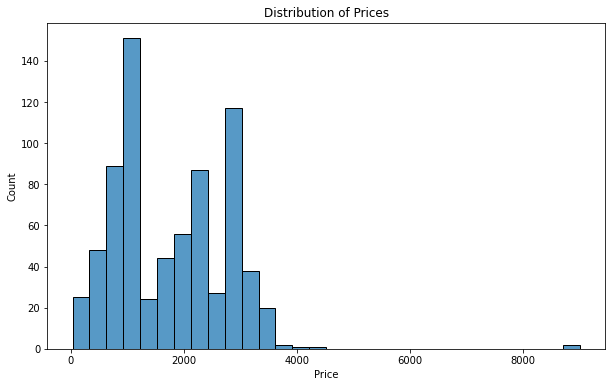

In [26]:
import seaborn as sns

# Distribution of prices
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30)
plt.title('Distribution of Prices')
plt.show()


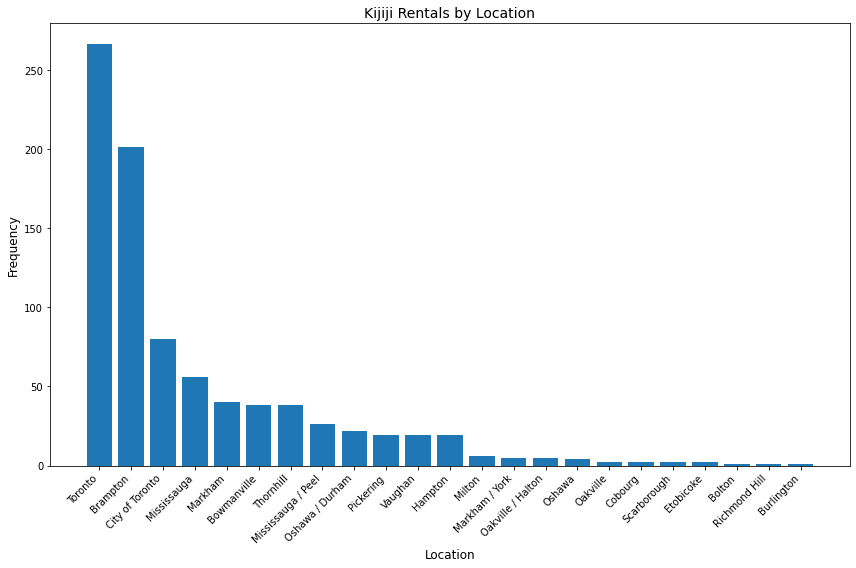

In [52]:
# get the value counts
Location_counts = df['Location'].value_counts()

# plot the value counts
# Plot bar chart
plt.figure(figsize=(12,8))
plt.bar(Location_counts.index, Location_counts.values)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Kijiji Rentals by Location', fontsize=14)
plt.tight_layout()
plt.show()

We can see the maximum number of rent and housing are opened in Toronto and Brampton

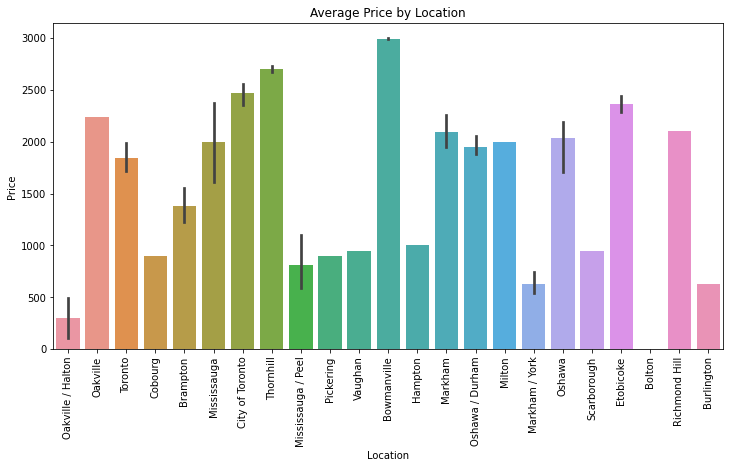

In [27]:

# Average price by location
plt.figure(figsize=(12,6))
sns.barplot(x='Location', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price by Location')
plt.show()


### Insights from the EDA
1. The distribution of prices is positively skewed, indicating that most of the posts are for lower priced listings.
2. The average price is highest in Oakville and lowest in Oshawa.

### NLP Work

In [28]:
descriptions = df['Description'].tolist()

In [29]:
import spacy

nlp = spacy.load("en_core_web_sm")

for description in descriptions:

    # Tokenize the text
    doc = nlp(description)

    # Remove stop words and punctuation
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]

    # Lemmatize the remaining words
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [30]:
from textblob import TextBlob

# Create a TextBlob object from the preprocessed text
blob = TextBlob(" ".join(lemmas))

# Get the sentiment polarity (-1 to 1)
polarity = blob.sentiment.polarity

# Get the sentiment subjectivity (0 to 1)
subjectivity = blob.sentiment.subjectivity

print("Sentiment polarity:", polarity)
print("Sentiment subjectivity:", subjectivity)

Sentiment polarity: 0.23125
Sentiment subjectivity: 0.45


In [38]:
from gensim import corpora, models

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary([lemmas])

# Create a bag-of-words corpus from the dictionary
corpus = [dictionary.doc2bow(lemmas)]

# Perform topic modeling on the corpus
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print the main topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.167*"bedroom" + 0.167*"house" + 0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"rent"')
(1, '0.167*"bedroom" + 0.167*"3" + 0.167*"1st" + 0.167*"April" + 0.167*"house" + 0.167*"rent"')
(2, '0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"house" + 0.167*"rent"')
(3, '0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"house" + 0.167*"rent" + 0.167*"1st"')
(4, '0.167*"1st" + 0.167*"bedroom" + 0.167*"3" + 0.167*"house" + 0.167*"April" + 0.167*"rent"')
(5, '0.167*"3" + 0.167*"April" + 0.167*"1st" + 0.167*"rent" + 0.167*"bedroom" + 0.167*"house"')
(6, '0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"rent" + 0.167*"house"')
(7, '0.167*"1st" + 0.167*"April" + 0.167*"bedroom" + 0.167*"rent" + 0.167*"3" + 0.167*"house"')
(8, '0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"house" + 0.167*"rent"')
(9, '0.167*"April" + 0.167*"bedroom" + 0.167*"1st" + 0.167*"3" + 0.167*"house" + 0.167*"rent"')


In [33]:
Title = df['Title'].tolist()

In [34]:
nlp = spacy.load("en_core_web_sm")

for title in Title:

    # Tokenize the text
    doc = nlp(title)

    # Remove stop words and punctuation
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]

    # Lemmatize the remaining words
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

In [35]:
from textblob import TextBlob

# Create a TextBlob object from the preprocessed text
blob = TextBlob(" ".join(lemmas))

# Get the sentiment polarity (-1 to 1)
polarity = blob.sentiment.polarity

# Get the sentiment subjectivity (0 to 1)
subjectivity = blob.sentiment.subjectivity

print("Sentiment polarity:", polarity)
print("Sentiment subjectivity:", subjectivity)

Sentiment polarity: 0.0
Sentiment subjectivity: 0.0


In [47]:
from gensim import corpora, models

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary([lemmas])
dictionary.save('dictionary.dict')

# Create a bag-of-words corpus from the dictionary
corpus = [dictionary.doc2bow(lemmas)]

# Perform topic modeling on the corpus
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)
lda_model.save('lda_model.model')
# Print the main topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.167*"bedroom" + 0.167*"3" + 0.167*"April" + 0.167*"house" + 0.167*"rent" + 0.167*"1st"')
(1, '0.167*"bedroom" + 0.167*"1st" + 0.167*"3" + 0.167*"rent" + 0.167*"April" + 0.167*"house"')
(2, '0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"house" + 0.167*"rent" + 0.167*"bedroom"')
(3, '0.167*"bedroom" + 0.167*"April" + 0.167*"house" + 0.167*"rent" + 0.167*"1st" + 0.167*"3"')
(4, '0.167*"house" + 0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"rent"')
(5, '0.167*"1st" + 0.167*"3" + 0.167*"bedroom" + 0.167*"house" + 0.167*"rent" + 0.167*"April"')
(6, '0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"house" + 0.167*"rent"')
(7, '0.167*"house" + 0.167*"1st" + 0.167*"bedroom" + 0.167*"3" + 0.167*"April" + 0.167*"rent"')
(8, '0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"rent" + 0.167*"1st" + 0.167*"house"')
(9, '0.167*"1st" + 0.167*"3" + 0.167*"April" + 0.167*"bedroom" + 0.167*"house" + 0.167*"rent"')


/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/

In [48]:
# Perform named entity recognition on the preprocessed text
entities = [(entity.text, entity.label_) for entity in doc.ents]

# Extract location entities
locations = [entity[0] for entity in entities if entity[1] == "GPE"]

# Extract date entities
dates = [entity[0] for entity in entities if entity[1] == "DATE"]

print("Locations:", locations)
print("Dates:", dates)

Locations: []
Dates: ['April 1st']


In [49]:
import pyLDAvis.gensim_models
import gensim

# Load your LDA model and dictionary
lda_model = gensim.models.LdaModel.load('lda_model.model')
dictionary = gensim.corpora.Dictionary.load('dictionary.dict')

# Generate the visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is